# Log returns plots

In [30]:
import pandas as pd
import numpy as np
import math
import pickle as pkl
import matplotlib.pyplot as plt

In [23]:
short_window = 21
long_window = 84

with open("Kraken_BTCUSD.pkl", "rb") as file:
    btc_kraken = pkl.load(file)
with open("Kraken_ETHUSD.pkl", "rb") as file:
    eth_kraken = pkl.load(file)

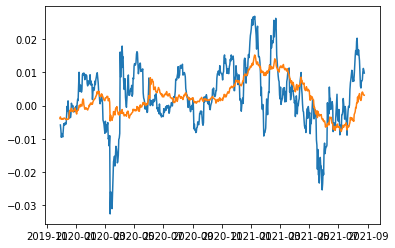

In [25]:
signal = btc_kraken["log_returns"].rolling(window=short_window).mean() - btc_kraken["log_returns"].rolling(window=long_window).mean()
signal = signal[long_window:]
plt.plot(btc_kraken["log_returns"].rolling(window=short_window).mean()[long_window:])
plt.plot(btc_kraken["log_returns"].rolling(window=long_window).mean())

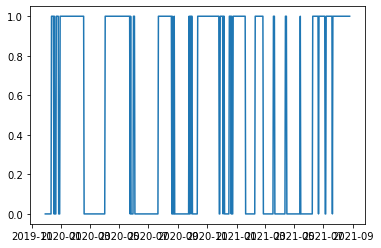

In [31]:
signal[signal<=0] = 0
plt.plot(np.sign(signal))

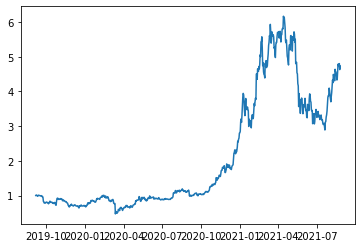

In [39]:
performance = btc_kraken.returns.cumprod()
plt.plot(performance)